In [ ]:
!dir

In [ ]:
!pip install ultralytics

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from IPython.display import display, Image
import ipywidgets as widgets
import threading
from ultralytics import YOLO
import math 

## Lets see how my trained model yolov8m detect person in video realtime

In [2]:
model = YOLO("weights/best-yolov8m.pt")

In [3]:
def predict_ShowVideo(source_model, source_video) :
    
    model = YOLO(source_model)
    source = source_video
    #model = YOLO("weights/best-yolov8m.pt")
    # Use source = 0 to specify the web cam as the video source, OR
    # specify the pathname to a video file to read.
    #source = 'video/Man walk cycle.mp4'

    # Create a video capture object from the VideoCapture Class.
    video_cap = cv2.VideoCapture(source)
    video_cap.set(3, 640)
    video_cap.set(4, 480)

    # Create a named window for the video display.
    win_name = 'Video Preview'
    cv2.namedWindow(win_name)
    classNames = ["person"]

    # Enter a while loop to read and display the video frames one at a time.
    while True:
        # Read one frame at a time using the video capture object.
        has_frame, frame = video_cap.read()
        if not has_frame:
            break
        results = model(frame, stream=False)
        for r in results:
            boxes = r.boxes

            for box in boxes:
                # bounding box
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2) # convert to int values

                # put box in cam
                cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 255), 3)

                # confidence
                confidence = math.ceil((box.conf[0]*100))/100
                print("Confidence --->",confidence)

                # class name
                cls = int(box.cls[0])
                print("Class name -->", classNames[cls])

                # object details
                org = [x1, y1]
                font = cv2.FONT_HERSHEY_SIMPLEX
                fontScale = 1
                color = (255, 0, 0)
                thickness = 2

                cv2.putText(frame, classNames[cls], org, font, fontScale, color, thickness)



        # Display the current frame in the named window.
        cv2.imshow(win_name, frame)

        # Use the waitKey() function to monitor the keyboard for user input.
        # key = cv2.waitKey(0) will display the window indefinitely until any key is pressed.
        # key = cv2.waitKey(1) will display the window for 1 ms
        key = cv2.waitKey(0)

        # The return value of the waitKey() function indicates which key was pressed.
        # You can use this feature to check if the user selected the `q` key to quit the video stream.
        if key == ord('Q') or key == ord('q') or key == 27:
            # Exit the loop.
            break
        #break
    video_cap.release()
    cv2.destroyWindow(win_name)

In [5]:
predict_ShowVideo("weights/best-yolov8m.pt", 'video/Man walk cycle.mp4')


0: 384x640 5 persons, 141.7ms
Speed: 0.0ms preprocess, 141.7ms inference, 329.8ms postprocess per image at shape (1, 3, 384, 640)
Confidence ---> 0.88
Class name --> person
Confidence ---> 0.74
Class name --> person
Confidence ---> 0.49
Class name --> person
Confidence ---> 0.45
Class name --> person
Confidence ---> 0.31
Class name --> person

0: 384x640 5 persons, 15.1ms
Speed: 0.0ms preprocess, 15.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
Confidence ---> 0.89
Class name --> person
Confidence ---> 0.71
Class name --> person
Confidence ---> 0.52
Class name --> person
Confidence ---> 0.5
Class name --> person
Confidence ---> 0.41
Class name --> person

0: 384x640 5 persons, 12.2ms
Speed: 0.0ms preprocess, 12.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Confidence ---> 0.87
Class name --> person
Confidence ---> 0.7
Class name --> person
Confidence ---> 0.61
Class name --> person
Confidence ---> 0.5
Class name --> person
Confidence ---> 

Confidence ---> 0.9
Class name --> person
Confidence ---> 0.66
Class name --> person
Confidence ---> 0.51
Class name --> person
Confidence ---> 0.46
Class name --> person
Confidence ---> 0.28
Class name --> person
Confidence ---> 0.26
Class name --> person

0: 384x640 6 persons, 12.7ms
Speed: 0.0ms preprocess, 12.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
Confidence ---> 0.91
Class name --> person
Confidence ---> 0.73
Class name --> person
Confidence ---> 0.51
Class name --> person
Confidence ---> 0.44
Class name --> person
Confidence ---> 0.34
Class name --> person
Confidence ---> 0.32
Class name --> person

0: 384x640 6 persons, 12.7ms
Speed: 0.0ms preprocess, 12.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Confidence ---> 0.92
Class name --> person
Confidence ---> 0.75
Class name --> person
Confidence ---> 0.51
Class name --> person
Confidence ---> 0.41
Class name --> person
Confidence ---> 0.28
Class name --> person
Confidence ---> 

0: 384x640 4 persons, 17.5ms
Speed: 0.0ms preprocess, 17.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
Confidence ---> 0.89
Class name --> person
Confidence ---> 0.69
Class name --> person
Confidence ---> 0.67
Class name --> person
Confidence ---> 0.6
Class name --> person

0: 384x640 4 persons, 15.7ms
Speed: 0.0ms preprocess, 15.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
Confidence ---> 0.88
Class name --> person
Confidence ---> 0.68
Class name --> person
Confidence ---> 0.66
Class name --> person
Confidence ---> 0.65
Class name --> person

0: 384x640 4 persons, 14.5ms
Speed: 0.0ms preprocess, 14.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
Confidence ---> 0.87
Class name --> person
Confidence ---> 0.73
Class name --> person
Confidence ---> 0.68
Class name --> person
Confidence ---> 0.67
Class name --> person

0: 384x640 5 persons, 16.3ms
Speed: 0.0ms preprocess, 16.3ms inference, 0.0ms postprocess per image at s

In [1]:
!dir

 Volume in drive D is MyData
 Volume Serial Number is CCB1-64B6

 Directory of D:\Users\kusumapur\OneDrive - PT Telekomunikasi Selular\IT BIN\Bootcamp AI\Project 2 - Person Detection

04/03/2024  10:49 AM    <DIR>          .
03/30/2024  09:51 AM    <DIR>          ..
04/02/2024  08:32 AM    <DIR>          .ipynb_checkpoints
03/31/2024  04:24 PM             1,473 04_01_Reading_and_Streaming_Videos.py
04/02/2024  08:29 AM         5,986,631 coba-300.ipynb
04/02/2024  08:28 AM            10,610 project 2 - EDA.ipynb
04/02/2024  08:32 AM         3,014,900 project 2 - train.ipynb
04/03/2024  10:49 AM            55,751 project 2 - video detection.ipynb
03/30/2024  05:20 PM         3,869,863 race_car_slow_motion.mp4
03/30/2024  09:50 AM           297,539 tes project 2-old.ipynb
04/02/2024  08:28 AM         5,989,812 tes project 2.ipynb
03/31/2024  12:01 PM             3,583 Untitled.ipynb
03/31/2024  11:55 AM    <DIR>          video
03/31/2024  04:36 PM    <DIR>          weights
               

In [3]:
model = YOLO("weights/best.pt")

In [4]:
def drawBBox(frame, x1, y1, x2, y2, text) :
        # put box in cam
        cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 255), 3)

        # object details
        org = [x1, y1]
        font = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 1
        color = (255, 0, 0)
        thickness = 2

        cv2.putText(frame, text, org, font, fontScale, color, thickness)

In [5]:
def drawBannerText(frame, text, banner_height_percent = 0.05, text_color = (0,255,0)):
        # Draw a black filled banner across the top of the image frame.
        # percent: set the banner height as a percentage of the frame height.
        banner_height = int(banner_height_percent * frame.shape[0])
        cv2.rectangle(frame, (0,0), (frame.shape[1],banner_height), (0,0,0), thickness=-1)

        # Draw text on banner.
        left_offset = 20
        location = (left_offset, int( 5 + (banner_height_percent * frame.shape[0])/2 ))
        fontScale = 1.5
        fontThickness = 2
        cv2.putText(frame, text, location, cv2.FONT_HERSHEY_PLAIN, fontScale, text_color, fontThickness, cv2.LINE_AA)

In [9]:
def predict_SaveVideo(source_model, source_video, file_out_avi=None, file_out_mp4=None) :

    model = YOLO(source_model)
    # Use source = 0 to specify the web cam as the video source, OR
    # specify the pathname to a video file to read.
    source = 'video/Man walk cycle.mp4'

    # Create a video capture object from the VideoCapture Class.
    video_cap = cv2.VideoCapture(source)
    #video_cap.set(3, 640)
    #video_cap.set(4, 480)

    # Create a named window for the video display.
    win_name = 'Video Preview'
    cv2.namedWindow(win_name)
    classNames = ["person"]

    if (video_cap.isOpened() == False):
        print("Error opening video stream or file")

    # Display first frame of the video.
    ret, frame = video_cap.read()
    cv2.imshow('First frame', frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Retrieve video frame properties.
    frame_w   = int(video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_h   = int(video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frame_fps = int(video_cap.get(cv2.CAP_PROP_FPS))

    # Specify the value for fourcc.
    fourcc_avi = cv2.VideoWriter_fourcc('M','J','P','G')
    fourcc_mp4 = cv2.VideoWriter_fourcc(*'mp4v')

    # Specify the video output file names.
    if file_out_avi is None :
        file_out_avi = f"{source_video}_out.avi"
    if file_out_mp4 is None :
        file_out_mp4 = f"{source_video}_out.mp4"

    # Slow down the speed of the video.
    frame_fps = int(frame_fps/2)

    # Create the video writer objects.
    out_avi = cv2.VideoWriter(file_out_avi, fourcc_avi, frame_fps, (frame_w,frame_h))
    out_mp4 = cv2.VideoWriter(file_out_mp4, fourcc_mp4, frame_fps, (frame_w,frame_h))

    # Process video frames.
    # Read all the frames in the video.
    frame_count = 0
    while True:

        # Read one frame at a time.
        ok, frame = video_cap.read()
        if not ok:
            break
        # Increment the frame count for the annotation.
        frame_count += 1

        results = model(frame, stream=True)


        for r in results:
            boxes = r.boxes
            #print(f"inference : {r.speed['inference']}")
            drawBannerText(frame, f"inference : {int(r.speed['inference'])} ms")

            for box in boxes:
                # bounding box
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2) # convert to int values

                # confidence
                confidence = math.ceil((box.conf[0]*100))/100
                #print("Confidence --->",confidence)

                # class name
                cls = int(box.cls[0])
                #print("Class name -->", classNames[cls])

                textLabel = f"{classNames[cls]} {confidence}"

                drawBBox(frame, x1, y1, x2, y2 , textLabel )

        # Write the frame to the output files.
        out_avi.write(frame)
        out_mp4.write(frame)

    # Release the VideoCapture and VideoWriter objects
    video_cap.release()
    out_avi.release()
    out_mp4.release()


In [11]:
predict_SaveVideo("weights/best-yolov8m.pt", 'video/Man walk cycle.mp4')


0: 384x640 5 persons, 80.5ms
Speed: 0.0ms preprocess, 80.5ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 2.5ms
Speed: 2.7ms preprocess, 2.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 13.7ms
Speed: 2.6ms preprocess, 13.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 3.2ms
Speed: 1.9ms preprocess, 3.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 4.0ms
Speed: 2.0ms preprocess, 4.0ms inference, 7.8ms postprocess per image at shape (1, 3, 384,


0: 384x640 4 persons, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 14.9ms
Speed: 2.7ms preprocess, 14.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 18.3ms
Speed: 2.1ms preprocess, 18.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 18.9ms
Speed: 3.0ms preprocess, 18.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 19.5ms
Speed: 1.9ms preprocess, 19.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 8.6ms
Speed: 2.9ms preprocess, 8.6ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 18.5ms
Speed: 3.1ms preprocess, 18.5ms inference, 0.0ms postprocess per image at shape (1, 3


0: 384x640 5 persons, 16.8ms
Speed: 2.0ms preprocess, 16.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 16.7ms
Speed: 2.1ms preprocess, 16.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 4.3ms
Speed: 1.9ms preprocess, 4.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 16.6ms
Speed: 2.0ms preprocess, 16.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 16.6ms
Speed: 1.9ms preprocess, 16.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 16.3ms
Speed: 4.1ms preprocess, 16.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 16.5ms
Speed: 2.9ms preprocess, 16.5ms inference, 1.4ms postprocess per image at shape (1,


0: 384x640 6 persons, 14.4ms
Speed: 1.0ms preprocess, 14.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 13.9ms
Speed: 2.1ms preprocess, 13.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 4.5ms
Speed: 1.9ms preprocess, 4.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 14.5ms
Speed: 2.0ms preprocess, 14.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 13.6ms
Speed: 1.9ms preprocess, 13.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 15.5ms
Speed: 0.0ms preprocess, 15.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 16.1ms
Speed: 3.2ms preprocess, 16.1ms inference, 1.4ms postprocess per image at shape (1,


0: 384x640 3 persons, 16.4ms
Speed: 2.0ms preprocess, 16.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 2.2ms
Speed: 1.4ms preprocess, 2.2ms inference, 15.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 15.5ms
Speed: 1.0ms preprocess, 15.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 16.1ms
Speed: 3.6ms preprocess, 16.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 8.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 15.0ms
Speed: 2.2ms preprocess, 15.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 0.0ms postprocess per image at shape (1


0: 384x640 2 persons, 20.8ms
Speed: 12.0ms preprocess, 20.8ms inference, 15.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 31.3ms
Speed: 0.0ms preprocess, 31.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 19.0ms
Speed: 0.0ms preprocess, 19.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 17.5ms
Speed: 0.0ms preprocess, 17.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 22.9ms
Speed: 0.0ms preprocess, 22.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 15.3ms
Speed: 0.0ms preprocess, 15.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 18.4ms
Speed: 0.0ms preprocess, 18.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.9ms
Speed: 0.0ms preprocess, 16.9ms inference, 0.0ms postprocess per image at shape (

In [8]:
predict_SaveVideo("weights/best-yolov8n.pt", 'video/Man walk cycle.mp4',file_out_mp4="video/Man walk cycle-yolo8n.mp4", file_out_avi="video/Man walk cycle-yolo8.avi")

PRO TIP 💡 Replace 'model=weights/best-yolov5m.pt' with new 'model=weights/best-yolov5mu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



FileNotFoundError: [Errno 2] No such file or directory: 'weights\\best-yolov5mu.pt'

In [10]:
!dir


 Volume in drive D is MyData
 Volume Serial Number is CCB1-64B6

 Directory of D:\Users\kusumapur\OneDrive - PT Telekomunikasi Selular\IT BIN\Bootcamp AI\Project 2 - Person Detection

04/05/2024  05:25 PM    <DIR>          .
03/30/2024  09:51 AM    <DIR>          ..
04/03/2024  11:01 AM    <DIR>          .ipynb_checkpoints
03/31/2024  04:24 PM             1,473 04_01_Reading_and_Streaming_Videos.py
04/02/2024  08:29 AM         5,986,631 coba-300.ipynb
04/05/2024  01:07 PM            10,801 project 2 - EDA.ipynb
04/02/2024  08:32 AM         3,014,900 project 2 - train.ipynb
04/05/2024  05:25 PM           110,238 project 2 - video detection.ipynb
03/30/2024  05:20 PM         3,869,863 race_car_slow_motion.mp4
03/30/2024  09:50 AM           297,539 tes project 2-old.ipynb
04/02/2024  08:28 AM         5,989,812 tes project 2.ipynb
03/31/2024  12:01 PM             3,583 Untitled.ipynb
04/03/2024  11:01 AM                 0 untitled.txt
04/03/2024  11:03 AM               855 Untitled1.ipynb


In [2]:
!pip3 install onnxruntime

Defaulting to user installation because normal site-packages is not writeable

In [3]:
import onnxruntime

opt_session = onnxruntime.SessionOptions()
opt_session.enable_mem_pattern = False
opt_session.enable_cpu_mem_arena = False
opt_session.graph_optimization_level = onnxruntime.GraphOptimizationLevel.ORT_DISABLE_ALL

In [4]:
model_path = 'weights/best-yolov8.onnx'
EP_list = ['CUDAExecutionProvider', 'CPUExecutionProvider']

ort_session = onnxruntime.InferenceSession(model_path, providers=EP_list)

D:\Users\kusumapur\AppData\Roaming\Python\Python39\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


In [5]:
model_inputs = ort_session.get_inputs()
input_names = [model_inputs[i].name for i in range(len(model_inputs))]
input_shape = model_inputs[0].shape
input_shape

[1, 3, 640, 640]

In [6]:
model_output = ort_session.get_outputs()
output_names = [model_output[i].name for i in range(len(model_output))]
# ouput_names[0].shap

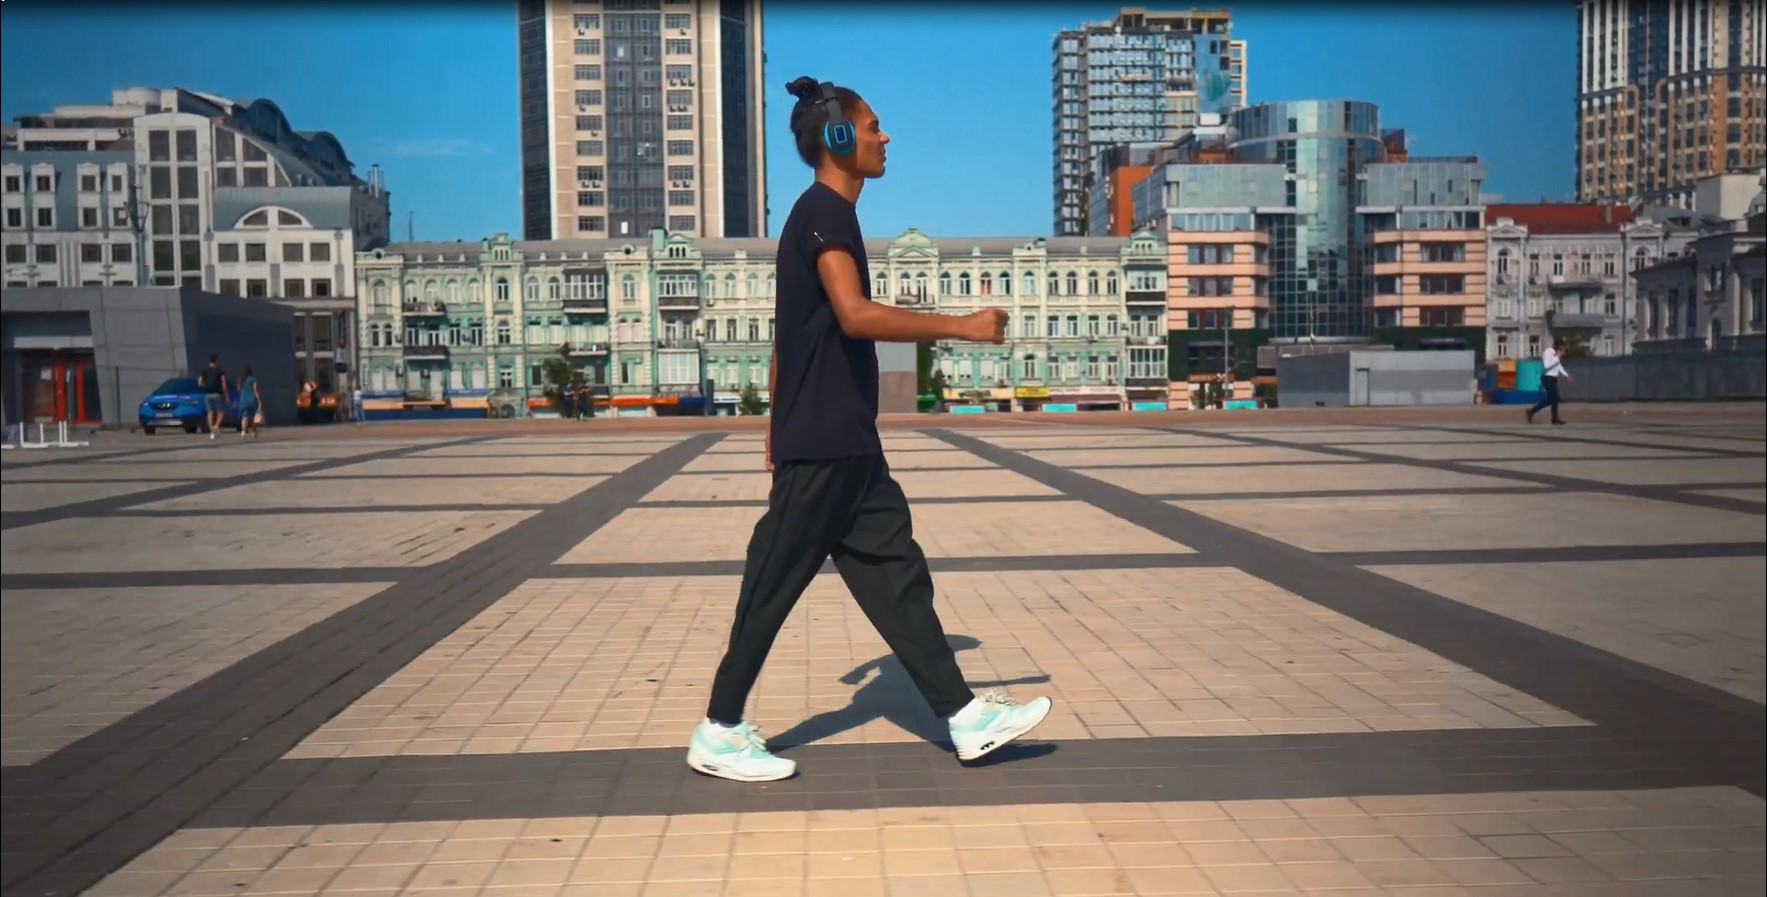

In [7]:
import cv2
import numpy as np
from PIL import Image

image = cv2.imread('person.jpg')
image_height, image_width = image.shape[:2]
Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [8]:
input_height, input_width = input_shape[2:]
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
resized = cv2.resize(image_rgb, (input_width, input_height))

# Scale input pixel value to 0 to 1
input_image = resized / 255.0
input_image = input_image.transpose(2,0,1)
input_tensor = input_image[np.newaxis, :, :, :].astype(np.float32)
input_tensor.shape

(1, 3, 640, 640)

In [9]:
input_tensor

array([[[[    0.11373,     0.44706,    0.019608, ...,    0.086275,         0.2,     0.20392],
         [   0.066667,    0.039216,    0.031373, ...,     0.10196,     0.22745,     0.22353],
         [   0.070588,    0.054902,    0.023529, ...,      0.1098,     0.26275,     0.24706],
         ...,
         [    0.15686,     0.19608,     0.21176, ...,     0.34902,     0.34902,     0.30196],
         [    0.16078,     0.20392,     0.21961, ...,     0.35294,     0.34902,     0.30196],
         [    0.17255,     0.20392,     0.21176, ...,     0.35294,     0.34902,     0.30196]],

        [[    0.15294,     0.52157,     0.12157, ...,     0.11765,     0.22353,     0.21961],
         [    0.11373,     0.12549,     0.14118, ...,     0.12941,     0.25098,     0.23922],
         [    0.13725,     0.15686,     0.14902, ...,     0.14118,     0.28627,     0.26275],
         ...,
         [    0.15294,     0.19216,     0.19608, ...,     0.31373,     0.31373,     0.28235],
         [    0.15686,        

In [10]:
outputs = ort_session.run(output_names, {input_names[0]: input_tensor})[0]

In [11]:
outputs

array([[[     7.2716,      14.577,      24.508, ...,      536.89,      559.98,      591.84],
        [     20.393,      13.635,      12.016, ...,      546.21,      540.56,      538.39],
        [     14.259,      28.056,      47.528, ...,      205.48,       158.6,      95.934],
        [     40.327,       27.38,      24.418, ...,      185.55,       198.5,      217.83],
        [ 5.9605e-07,           0,           0, ...,           0,           0,  1.6987e-06]]], dtype=float32)

In [12]:
predictions = np.squeeze(outputs).T
predictions  

array([[     7.2716,      20.393,      14.259,      40.327,  5.9605e-07],
       [     14.577,      13.635,      28.056,       27.38,           0],
       [     24.508,      12.016,      47.528,      24.418,           0],
       ...,
       [     536.89,      546.21,      205.48,      185.55,           0],
       [     559.98,      540.56,       158.6,       198.5,           0],
       [     591.84,      538.39,      95.934,      217.83,  1.6987e-06]], dtype=float32)

In [13]:
conf_thresold = 0.5
# Filter out object confidence scores below threshold
scores = np.max(predictions[:, 4:], axis=1)
predictions = predictions[scores > conf_thresold, :]
scores = scores[scores > conf_thresold]
scores

array([    0.56937,     0.65384,     0.58587,      0.6425,     0.65608,     0.67725,     0.68019,     0.70175,     0.69962,     0.70433,     0.81069,     0.83459,     0.85398,     0.84013,      0.8402,     0.89258,     0.85073,     0.85771,     0.85264,     0.85081], dtype=float32)

In [14]:
# Get the class with the highest confidence
class_ids = np.argmax(predictions[:, 4:], axis=1)
class_ids

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [15]:
# Get bounding boxes for each object
boxes = predictions[:, :4]

#rescale box
input_shape = np.array([input_width, input_height, input_width, input_height])
boxes = np.divide(boxes, input_shape, dtype=np.float32)
boxes *= np.array([image_width, image_height, image_width, image_height])
boxes = boxes.astype(np.int32)
boxes

array([[1545,  382,   55,   85],
       [1546,  382,   55,   85],
       [1546,  382,   54,   84],
       [1546,  382,   53,   84],
       [1546,  382,   53,   84],
       [1547,  382,   53,   84],
       [1547,  382,   52,   84],
       [1547,  381,   52,   84],
       [1547,  382,   50,   84],
       [1548,  382,   51,   84],
       [ 852,  430,  351,  708],
       [ 850,  429,  347,  706],
       [ 861,  430,  360,  709],
       [ 858,  430,  358,  711],
       [ 856,  430,  359,  710],
       [ 869,  429,  363,  707],
       [ 864,  429,  361,  710],
       [ 864,  429,  362,  709],
       [ 868,  426,  367,  713],
       [ 868,  426,  365,  713]])

In [16]:
def nms(boxes, scores, iou_threshold):
    # Sort by score
    sorted_indices = np.argsort(scores)[::-1]

    keep_boxes = []
    while sorted_indices.size > 0:
        # Pick the last box
        box_id = sorted_indices[0]
        keep_boxes.append(box_id)

        # Compute IoU of the picked box with the rest
        ious = compute_iou(boxes[box_id, :], boxes[sorted_indices[1:], :])

        # Remove boxes with IoU over the threshold
        keep_indices = np.where(ious < iou_threshold)[0]

        # print(keep_indices.shape, sorted_indices.shape)
        sorted_indices = sorted_indices[keep_indices + 1]

    return keep_boxes

def compute_iou(box, boxes):
    # Compute xmin, ymin, xmax, ymax for both boxes
    xmin = np.maximum(box[0], boxes[:, 0])
    ymin = np.maximum(box[1], boxes[:, 1])
    xmax = np.minimum(box[2], boxes[:, 2])
    ymax = np.minimum(box[3], boxes[:, 3])

    # Compute intersection area
    intersection_area = np.maximum(0, xmax - xmin) * np.maximum(0, ymax - ymin)

    # Compute union area
    box_area = (box[2] - box[0]) * (box[3] - box[1])
    boxes_area = (boxes[:, 2] - boxes[:, 0]) * (boxes[:, 3] - boxes[:, 1])
    union_area = box_area + boxes_area - intersection_area

    # Compute IoU
    iou = intersection_area / union_area

    return iou

In [17]:
# Apply non-maxima suppression to suppress weak, overlapping bounding boxes
indices = nms(boxes, scores, 0.3)
print(indices)

[15, 17, 12, 18, 19, 16, 14, 13, 11, 10, 9, 7, 8, 6, 5, 4, 1, 3, 2, 0]


In [18]:
boxes[indices], scores[indices], class_ids[indices]

(array([[ 869,  429,  363,  707],
        [ 864,  429,  362,  709],
        [ 861,  430,  360,  709],
        [ 868,  426,  367,  713],
        [ 868,  426,  365,  713],
        [ 864,  429,  361,  710],
        [ 856,  430,  359,  710],
        [ 858,  430,  358,  711],
        [ 850,  429,  347,  706],
        [ 852,  430,  351,  708],
        [1548,  382,   51,   84],
        [1547,  381,   52,   84],
        [1547,  382,   50,   84],
        [1547,  382,   52,   84],
        [1547,  382,   53,   84],
        [1546,  382,   53,   84],
        [1546,  382,   55,   85],
        [1546,  382,   53,   84],
        [1546,  382,   54,   84],
        [1545,  382,   55,   85]]),
 array([    0.89258,     0.85771,     0.85398,     0.85264,     0.85081,     0.85073,      0.8402,     0.84013,     0.83459,     0.81069,     0.70433,     0.70175,     0.69962,     0.68019,     0.67725,     0.65608,     0.65384,      0.6425,     0.58587,     0.56937], dtype=float32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0

In [19]:
CLASSES = [
	'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 
	'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 
	'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 
	'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 
	'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 
	'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 
	'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 
	'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 
	'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase',
	'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [20]:
def xywh2xyxy(x):
    # Convert bounding box (x, y, w, h) to bounding box (x1, y1, x2, y2)
    y = np.copy(x)
    y[..., 0] = x[..., 0] - x[..., 2] / 2
    y[..., 1] = x[..., 1] - x[..., 3] / 2
    y[..., 2] = x[..., 0] + x[..., 2] / 2
    y[..., 3] = x[..., 1] + x[..., 3] / 2
    return y

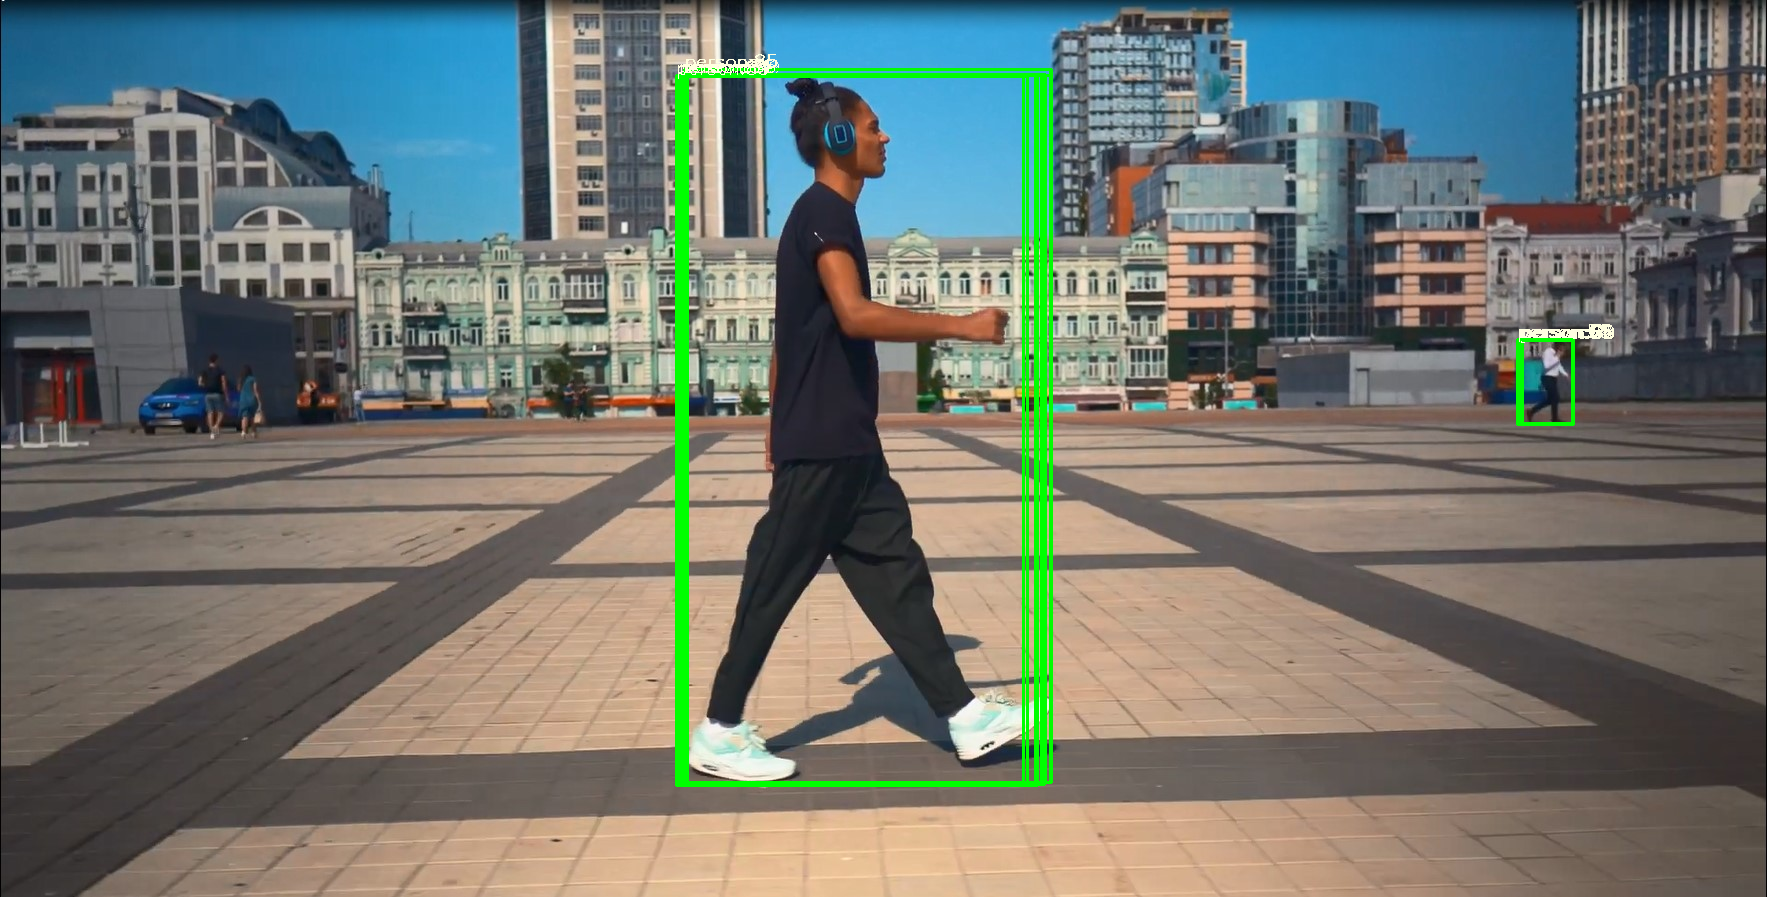

In [21]:
image_draw = image.copy()
for (bbox, score, label) in zip(xywh2xyxy(boxes[indices]), scores[indices], class_ids[indices]):
    bbox = bbox.round().astype(np.int32).tolist()
    cls_id = int(label)
    cls = CLASSES[cls_id]
    color = (0,255,0)
    cv2.rectangle(image_draw, tuple(bbox[:2]), tuple(bbox[2:]), color, 2)
    cv2.putText(image_draw,
                f'{cls}:{int(score*100)}', (bbox[0], bbox[1] - 2),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.60, [225, 255, 255],
                thickness=1)
Image.fromarray(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))

In [22]:
import cv2

# Load Model
net = cv2.dnn.readNet('weights/best-yolov8.onnx')

In [23]:
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)

In [24]:
INPUT_WIDTH = 640
INPUT_HEIGHT = 640
SCORE_THRESHOLD = 0.2
NMS_THRESHOLD = 0.4
CONFIDENCE_THRESHOLD = 0.4

# Define yolov8 classes
CLASESS_YOLO = [
 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 
 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 
 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 
 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 
 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 
 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 
 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 
 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 
 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase',
 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [25]:
image = cv2.imread('person.jpg')
blob = cv2.dnn.blobFromImage(image, 1/255.0, (INPUT_WIDTH, INPUT_HEIGHT), swapRB=True, crop=False)
net.setInput(blob)
preds = net.forward()
preds = preds.transpose((0, 2, 1))

In [27]:
# Extract output detection
class_ids, confs, boxes = list(), list(), list()

image_height, image_width, _ = image.shape
x_factor = image_width / INPUT_WIDTH
y_factor = image_height / INPUT_HEIGHT

rows = preds[0].shape[0]

for i in range(rows):
    row = preds[0][i]
    conf = row[4]
    
    classes_score = row[4:]
    _,_,_, max_idx = cv2.minMaxLoc(classes_score)
    class_id = max_idx[1]
    if (classes_score[class_id] > .25):
        confs.append(conf)
        label = CLASESS_YOLO[int(class_id)]
        class_ids.append(label)
        
        #extract boxes
        x, y, w, h = row[0].item(), row[1].item(), row[2].item(), row[3].item() 
        left = int((x - 0.5 * w) * x_factor)
        top = int((y - 0.5 * h) * y_factor)
        width = int(w * x_factor)
        height = int(h * y_factor)
        box = np.array([left, top, width, height])
        boxes.append(box)
        
r_class_ids, r_confs, r_boxes = list(), list(), list()

indexes = cv2.dnn.NMSBoxes(boxes, confs, 0.25, 0.45) 
for i in indexes:
    r_class_ids.append(class_ids[i])
    r_confs.append(confs[i])
    r_boxes.append(boxes[i])

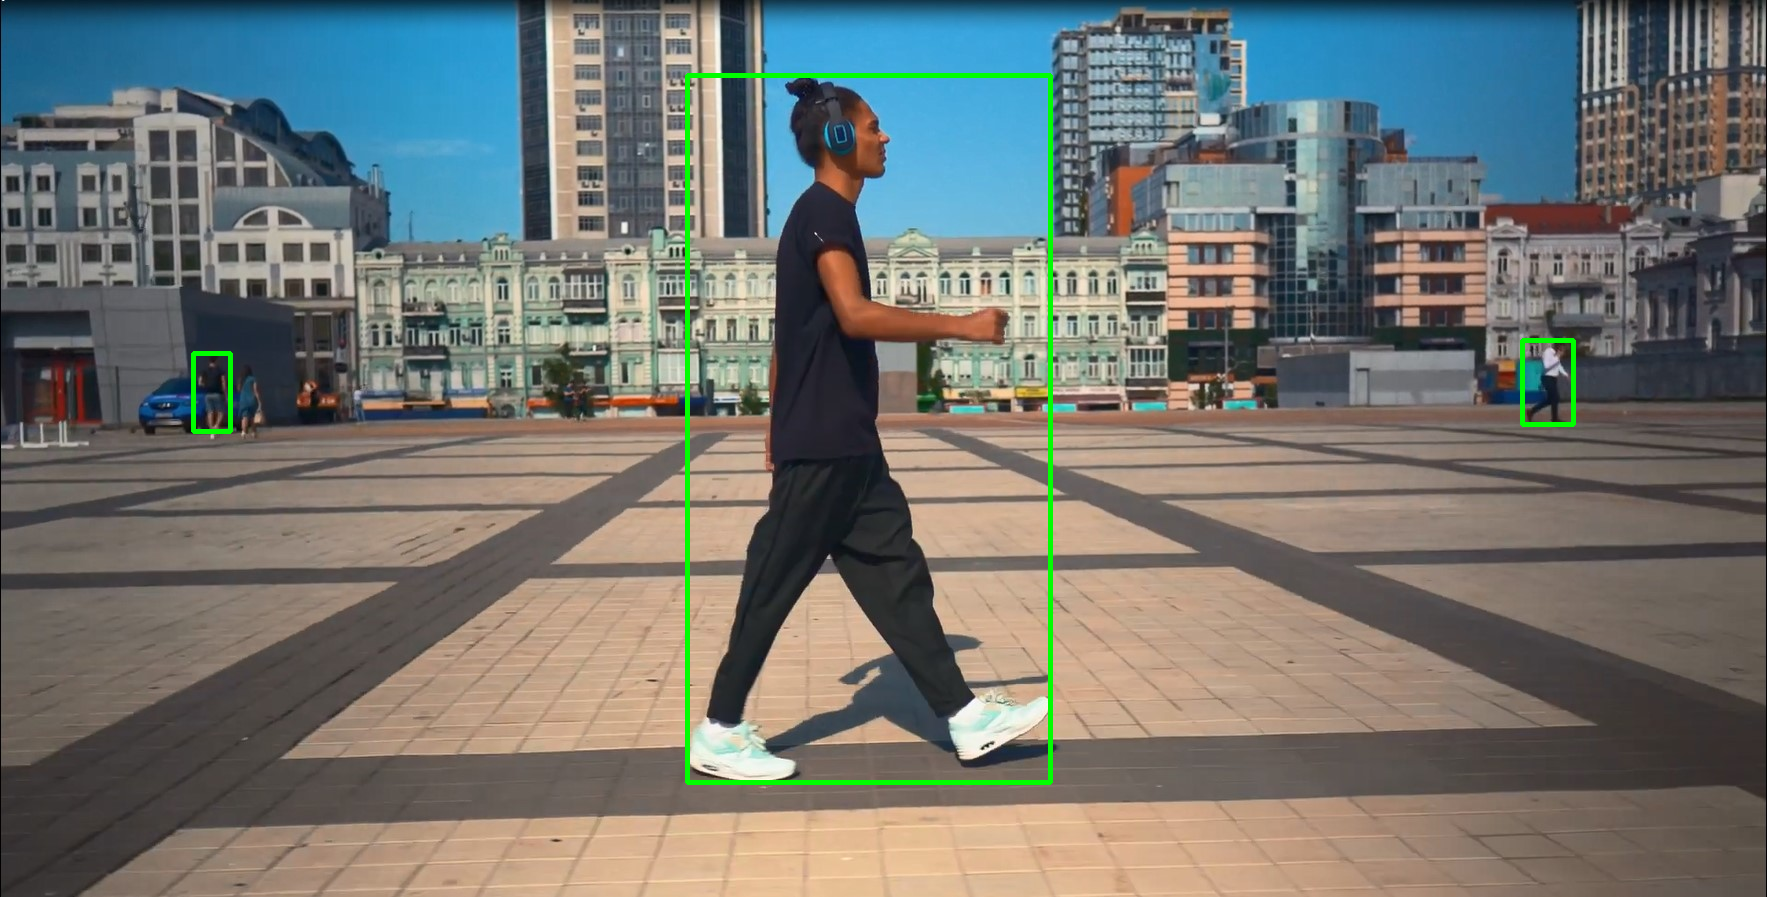

In [28]:
for i in indexes:
    box = boxes[i]
    left = box[0]
    top = box[1]
    width = box[2]
    height = box[3]
    
    cv2.rectangle(image, (left, top), (left + width, top + height), (0,255,0), 3)
Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))